In [1]:
import ccalnoir as ccal
import cuzcatlan as cusca
import pandas as pd
import os

In [2]:
def read_cls(file):
    with open(file) as f:
        f.readline()
        line = f.readline()
        vals = line.strip('\n').split(' ')
        print(f'0-->{vals[1]}\n1-->{vals[2]}')
        
    return

In [19]:
# This could be a for loop, but it is cleaner as a function
def create_subgroup_reports(subgroup, pearson=True,number_of_permutations=10):
    if not os.path.exists(f'results/{subgroup}'):
        os.makedirs(f'results/{subgroup}')
    if pearson:
        print('============================================')
        print('==> Using Pearson correlation as the "Score"')
        print('============================================')
        ccal.differential_gene_expression(gene_expression='results/pdx_drug_scores.gct',
                                      phenotype_file=f'results/{subgroup}.cls',
                                      output_filename=f'results/{subgroup}/significance',
                                      ranking_method=cusca.custom_pearson_corr,
                                      number_of_permutations=number_of_permutations)
    else:
        print('================================================')
        print('==> Using Information Coefficient as the "Score"')
        print('================================================')
        ccal.differential_gene_expression(gene_expression='results/pdx_drug_scores.gct',
                                  phenotype_file=f'results/{subgroup}.cls',
                                  output_filename=f'results/{subgroup}/significance',
                                  ranking_method=cusca.information_coefficient,
                                  number_of_permutations=number_of_permutations)
    print('-----')
    read_cls(f'results/{subgroup}.cls')
    print('-----')
    significance = pd.read_table(f'results/{subgroup}/significance.match.txt',index_col=0)
    effective_drugs = significance[significance['Score']>0]
    effective_drugs.drop(['Score(0.95 MoE)'],axis=1,inplace=True)
    # load info for all drugs:
    pdx_df = pd.read_excel('results/drug_scores_DiSCoVER_only_for_all_pdx_models.xlsx')
    # Add MoAs to effective drug
    effective_drugs.insert(loc=0,column='MoA',value=pdx_df['moa'])
    #Saving individual results to a spreadsheet.
    effective_drugs.to_excel(f'results/{subgroup}/{subgroup}_specific_drugs_from_expression.xlsx')
    print(f'File named "results/{subgroup}/{subgroup}_specific_drugs_from_expression.xlsx" saved successfully!')
    print('-----')
    print("Effective drugs (i.e., drugs with Score>0)")
    display(effective_drugs)

In [11]:
number_of_permutations = 10000
pearson=True

==> Using Pearson correlation as the "Score"
Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7fcc4a6c36a8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10000 permutations ...
	1/10000 ...
	1001/10000 ...
	2001/10000 ...
	3001/10000 ...
	4001/10000 ...
	5001/10000 ...
	6001/10000 ...
	7001/10000 ...
	8001/10000 ...
	9001/10000 ...
	10000/10000 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


-----------------------------------------------
The PDF of this heatmap can be downloaded here:



-----------------------------------------------
The TXT with the data displayed on the heatmap can be downloaded here:



-----------------------------------------------
done!


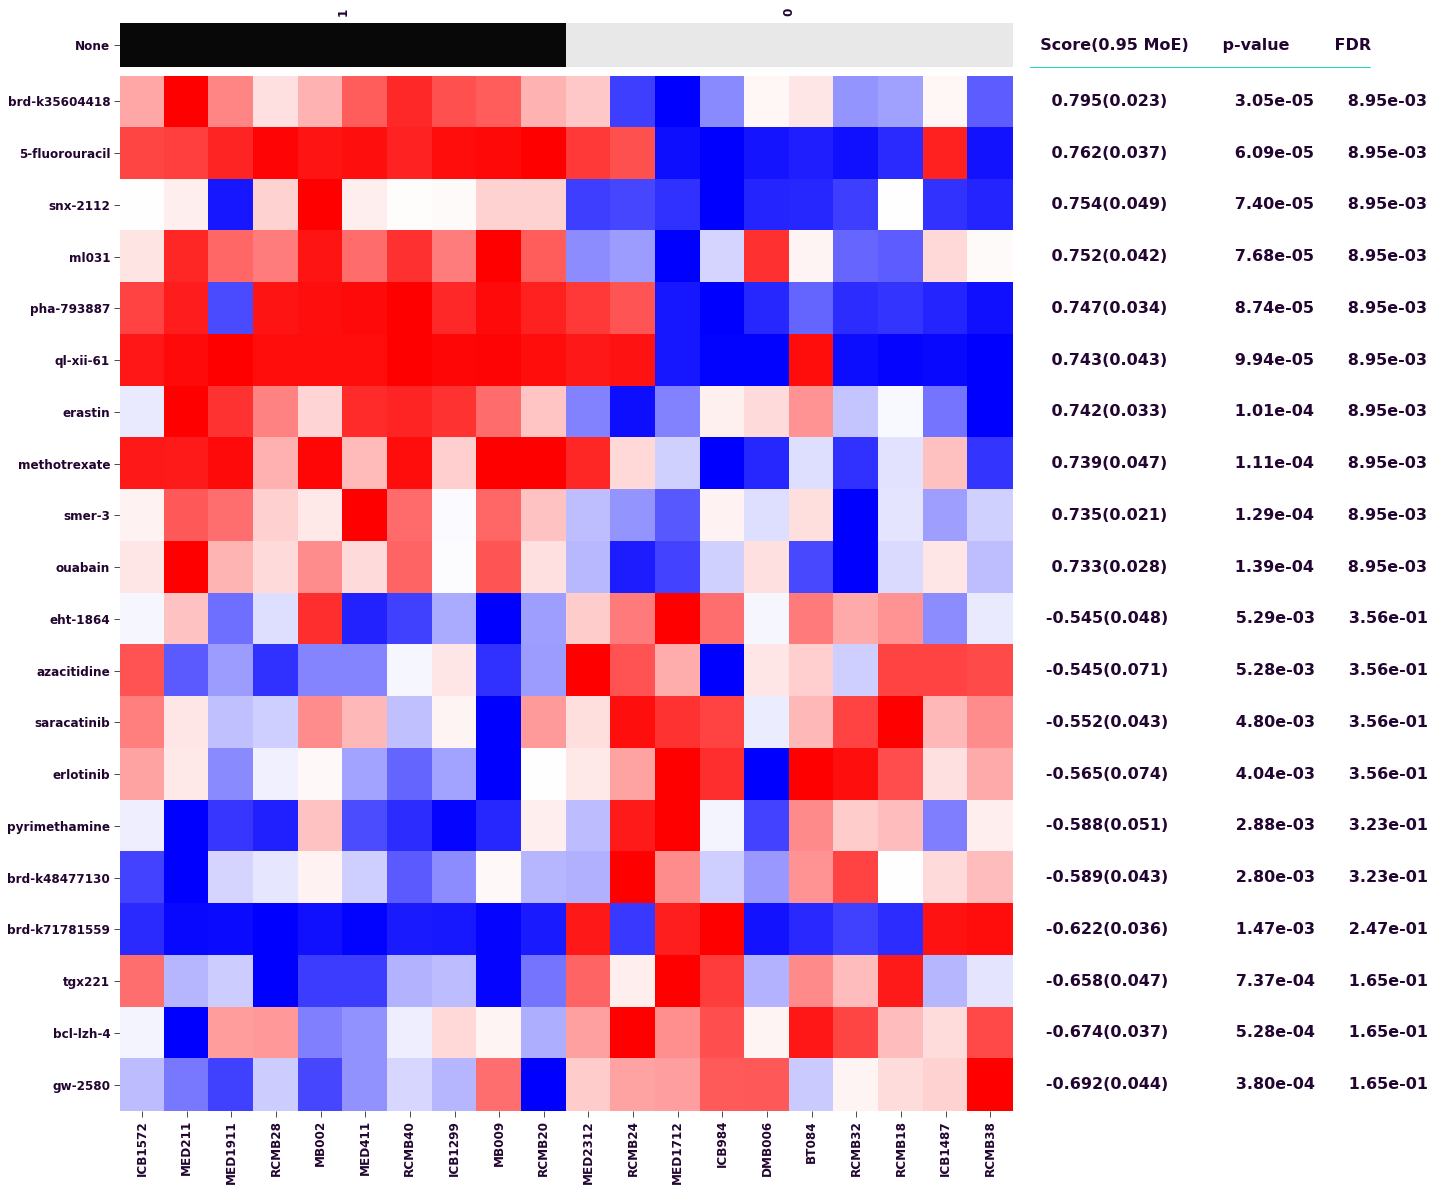

-----
0-->other
1-->G3
-----
File named "results/G3/G3_effective_drugs_from_expression.xlsx" saved successfully!
-----
Effective drugs (i.e., drugs with Score>0)


,MoA,0.95 MoE,p-value,FDR,Score
Name,,,,,
brd-k35604418,Not Clinically Relevant,0.023001,0.000031,0.008946,0.795142
5-fluorouracil,antimetabolite,0.036719,0.000061,0.008946,0.762281
snx-2112,Not Clinically Relevant,0.048559,0.000074,0.008946,0.753570
ml031,Not Clinically Relevant,0.041974,0.000077,0.008946,0.751774
pha-793887,"CDK inhibitor, esp CDK2, CDK5 and CDK7",0.034490,0.000087,0.008946,0.747292
ql-xii-61,Not Clinically Relevant,0.042615,0.000099,0.008946,0.742779
erastin,Not Clinically Relevant,0.033202,0.000101,0.008946,0.742203
methotrexate,"antimetabolite, competitively inhibits dihydro...",0.047058,0.000111,0.008946,0.739038
smer-3,Not Clinically Relevant,0.021167,0.000129,0.008946,0.735465


In [14]:
create_subgroup_reports(subgroup='G3', pearson=pearson, number_of_permutations=number_of_permutations)

==> Using Pearson correlation as the "Score"
Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7fcc4a6c36a8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10000 permutations ...
	1/10000 ...
	1001/10000 ...
	2001/10000 ...
	3001/10000 ...
	4001/10000 ...
	5001/10000 ...
	6001/10000 ...
	7001/10000 ...
	8001/10000 ...
	9001/10000 ...
	10000/10000 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


-----------------------------------------------
The PDF of this heatmap can be downloaded here:



-----------------------------------------------
The TXT with the data displayed on the heatmap can be downloaded here:



-----------------------------------------------
done!


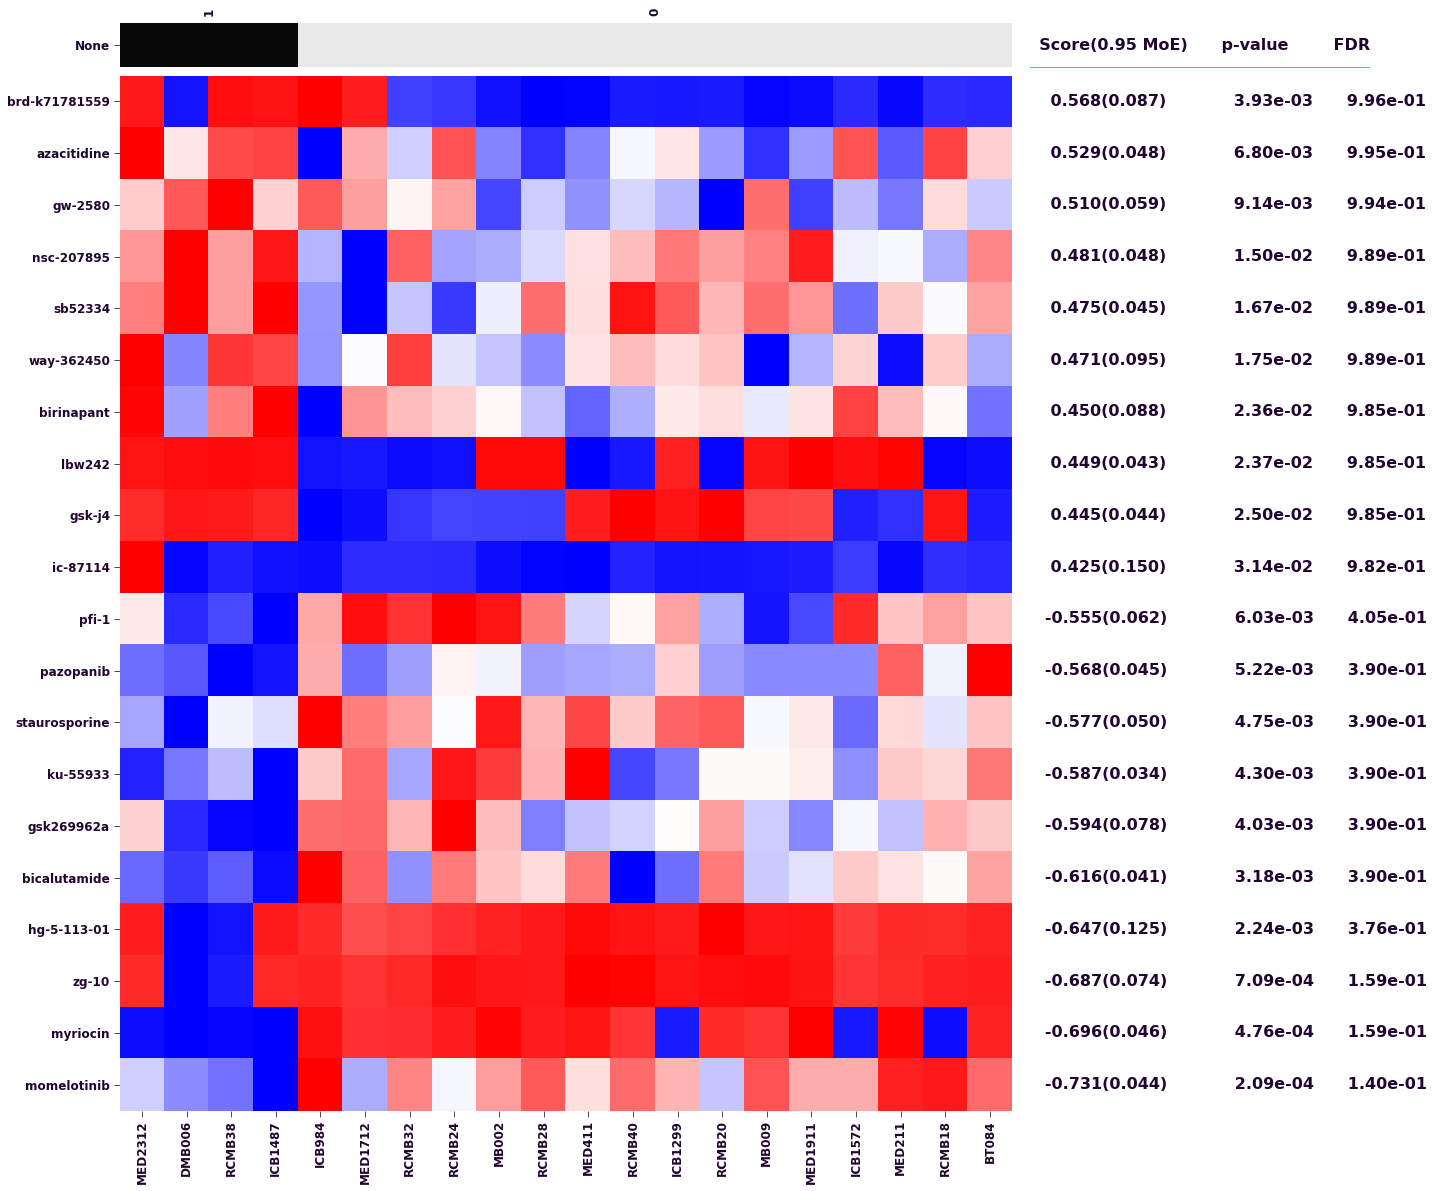

-----
0-->other
1-->G4
-----
File named "results/G4/G4_effective_drugs_from_expression.xlsx" saved successfully!
-----
Effective drugs (i.e., drugs with Score>0)


,MoA,0.95 MoE,p-value,FDR,Score
Name,,,,,
brd-k71781559,Not Clinically Relevant,0.087025,0.003935,0.996065,0.568160
azacitidine,"Nucleoside analog, inhibitor of DNA methylatio...",0.048199,0.006800,0.994680,0.529350
gw-2580,Not Clinically Relevant,0.059249,0.009136,0.993822,0.509733
nsc-207895,Not Clinically Relevant,0.048054,0.015014,0.989405,0.481406
sb52334,Not Clinically Relevant,0.045401,0.016687,0.989201,0.474623
way-362450,Not Clinically Relevant,0.094559,0.017532,0.989201,0.471319
birinapant,"SMAC mimetic, mostly to cIAP1, less potent aga...",0.088350,0.023565,0.985232,0.449777
lbw242,Not Clinically Relevant,0.043113,0.023717,0.985232,0.449393
gsk-j4,Not Clinically Relevant,0.044429,0.025004,0.985232,0.445134


In [15]:
create_subgroup_reports(subgroup='G4', pearson=pearson, number_of_permutations=number_of_permutations)

==> Using Pearson correlation as the "Score"
Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7fcc4a6c36a8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10000 permutations ...
	1/10000 ...
	1001/10000 ...
	2001/10000 ...
	3001/10000 ...
	4001/10000 ...
	5001/10000 ...
	6001/10000 ...
	7001/10000 ...
	8001/10000 ...
	9001/10000 ...
	10000/10000 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


-----------------------------------------------
The PDF of this heatmap can be downloaded here:



-----------------------------------------------
The TXT with the data displayed on the heatmap can be downloaded here:



-----------------------------------------------
done!


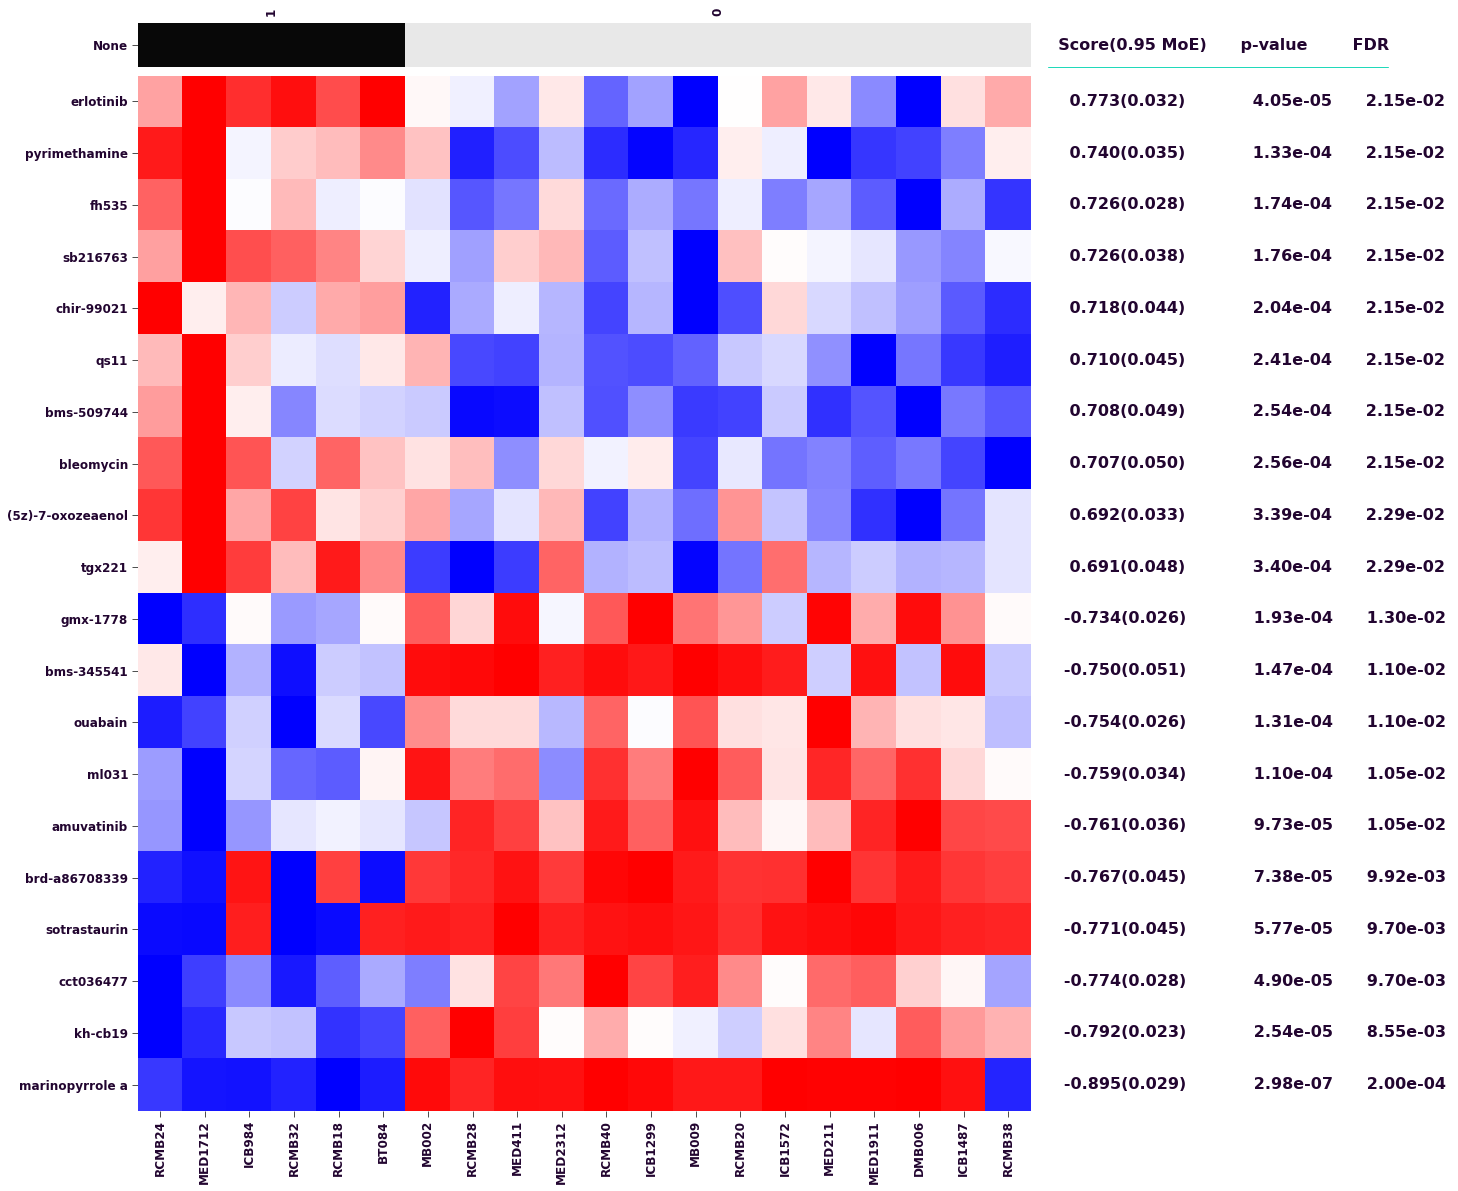

-----
0-->other
1-->SHH
-----
File named "results/SHH/SHH_effective_drugs_from_expression.xlsx" saved successfully!
-----
Effective drugs (i.e., drugs with Score>0)


,MoA,0.95 MoE,p-value,FDR,Score
Name,,,,,
erlotinib,EGFR inhibitor (Tarceva),0.032283,0.000040,0.021462,0.773137
pyrimethamine,Not Clinically Relevant,0.035144,0.000133,0.021462,0.740265
fh535,Not Clinically Relevant,0.028125,0.000174,0.021462,0.726345
sb216763,Not Clinically Relevant,0.037680,0.000176,0.021462,0.725598
chir-99021,Not Clinically Relevant,0.044415,0.000204,0.021462,0.718488
qs11,Not Clinically Relevant,0.044949,0.000241,0.021462,0.710235
bms-509744,Not Clinically Relevant,0.048962,0.000254,0.021462,0.707529
bleomycin,"Induces DNA strand breaks, inhibits incorporat...",0.050252,0.000256,0.021462,0.706937
(5z)-7-oxozeaenol,Not Clinically Relevant,0.033056,0.000339,0.022860,0.691532


In [16]:
create_subgroup_reports(subgroup='SHH', pearson=pearson, number_of_permutations=number_of_permutations)

==> Using Pearson correlation as the "Score"
Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7fcc4a6c36a8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10000 permutations ...
	1/10000 ...
	1001/10000 ...
	2001/10000 ...
	3001/10000 ...
	4001/10000 ...
	5001/10000 ...
	6001/10000 ...
	7001/10000 ...
	8001/10000 ...
	9001/10000 ...
	10000/10000 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


-----------------------------------------------
The PDF of this heatmap can be downloaded here:



-----------------------------------------------
The TXT with the data displayed on the heatmap can be downloaded here:



-----------------------------------------------
done!


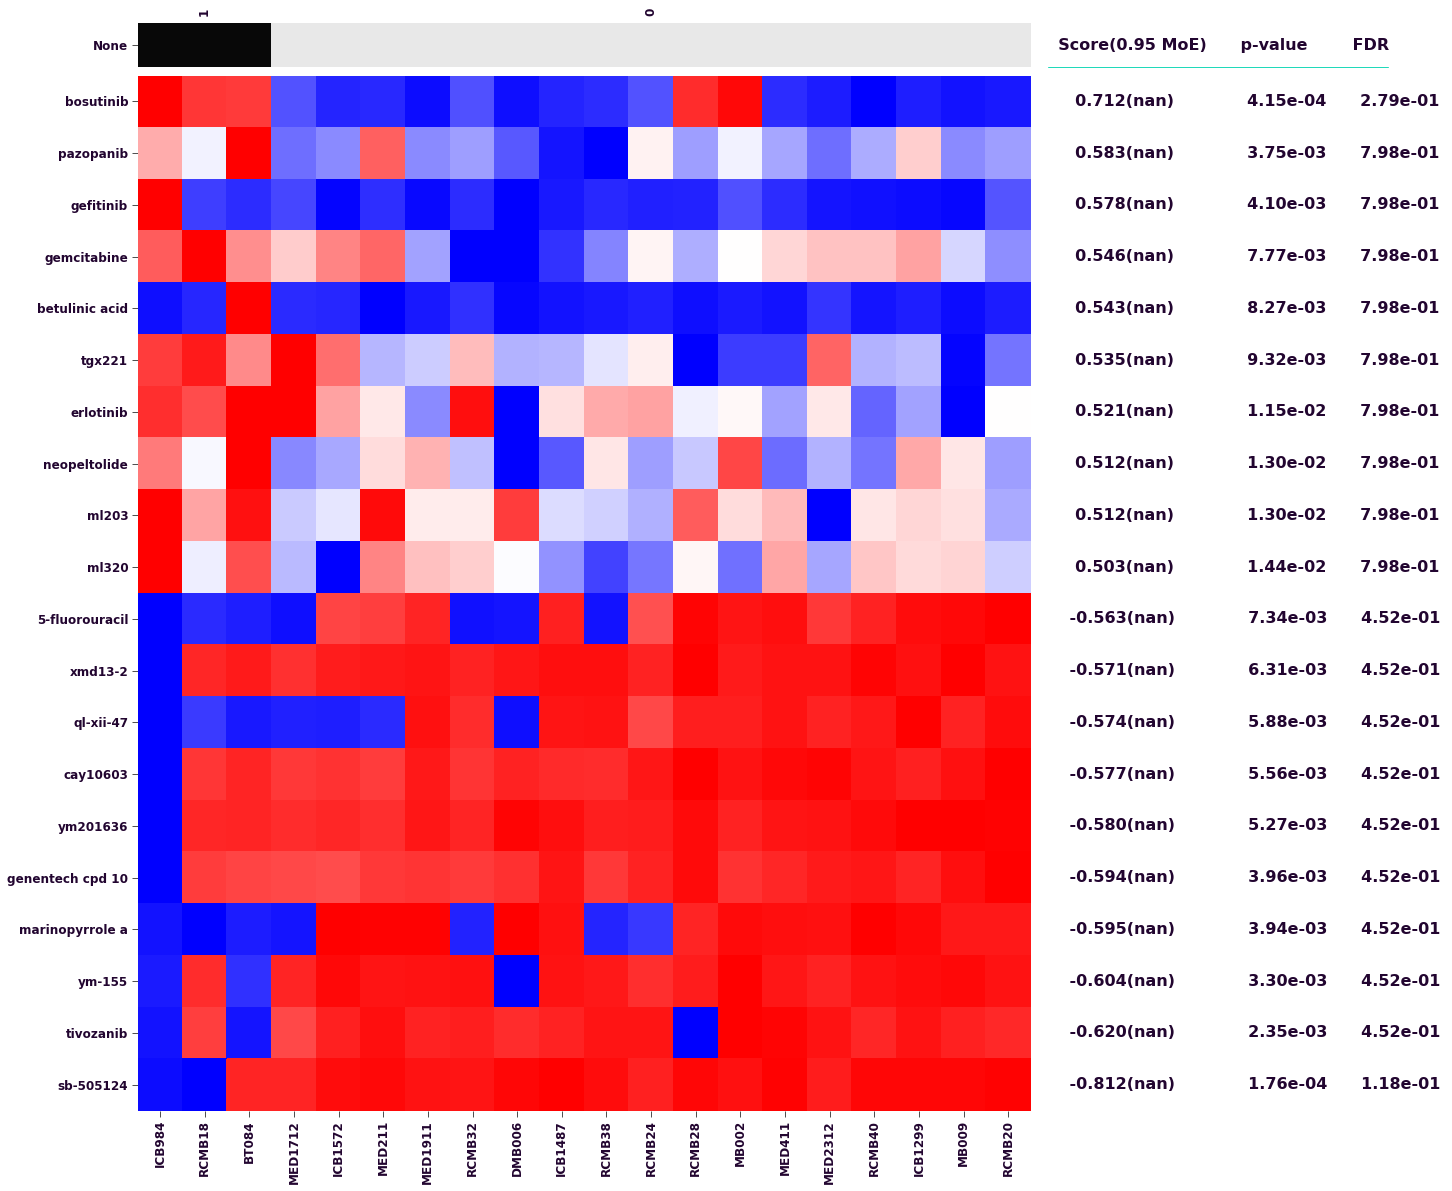

-----
0-->other
1-->SHH+p53
-----
File named "results/SHH+p53/SHH+p53_effective_drugs_from_expression.xlsx" saved successfully!
-----
Effective drugs (i.e., drugs with Score>0)


,MoA,0.95 MoE,p-value,FDR,Score
Name,,,,,
bosutinib,"BCR-Abl, Src, Lyn and Hck inhibitor",NaN,0.000415,0.278800,0.711881
pazopanib,"KIT, FGFR, PDGFR and VEGFR inhibitor",NaN,0.003753,0.798318,0.582868
gefitinib,EGFR inhibitor (Iressa),NaN,0.004097,0.798318,0.578185
gemcitabine,"Nucleoside analog,incorporation into DNA creat...",NaN,0.007767,0.798318,0.545875
betulinic acid,Not Clinically Relevant,NaN,0.008271,0.798318,0.542507
tgx221,Not Clinically Relevant,NaN,0.009324,0.798318,0.535140
erlotinib,EGFR inhibitor (Tarceva),NaN,0.011455,0.798318,0.521062
neopeltolide,Not Clinically Relevant,NaN,0.012962,0.798318,0.512044
ml203,Not Clinically Relevant,NaN,0.013026,0.798318,0.511657


In [17]:
create_subgroup_reports(subgroup='SHH+p53', pearson=pearson, number_of_permutations=number_of_permutations)

In [22]:
def concatenate_subgroup_reports():
    """Assuming that individual reports exist!"""
    writer = pd.ExcelWriter('results/subgroup_specific_drugs_from_expression.xlsx')
    for subgroup in ['G3','G4','SHH','SHH+p53']:  
        #Saving results to a sheet in a summary 
        effective_drugs = pd.read_excel(f'results/{subgroup}/{subgroup}_specific_drugs_from_expression.xlsx',index_col=0)
        effective_drugs.to_excel(writer,sheet_name=f'{subgroup}')
        print(f'Sheet named "{subgroup}" added successfully to file named "results/subgroup_specific_drugs_from_expression.xlsx"!')
    writer.save()
    print("All done!")

In [23]:
concatenate_subgroup_reports()

Sheet named "G3" added successfully to file named "results/subgroup_specific_drugs_from_expression.xlsx"!
Sheet named "G4" added successfully to file named "results/subgroup_specific_drugs_from_expression.xlsx"!
Sheet named "SHH" added successfully to file named "results/subgroup_specific_drugs_from_expression.xlsx"!
Sheet named "SHH+p53" added successfully to file named "results/subgroup_specific_drugs_from_expression.xlsx"!
All done!


In [13]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://genepattern.broadinstitute.org/gp", "", ""))

GPAuthWidget()